# Customer Segmentation Project

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px


In [5]:

## 2. Load Dataset
df = pd.read_csv("C:\\Users\\moham\\Downloads\Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:

## 3. Data Cleaning & Preprocessing

# Drop ID column
df = df.drop(columns=['CustomerID'])

# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Feature Scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

scaled_df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


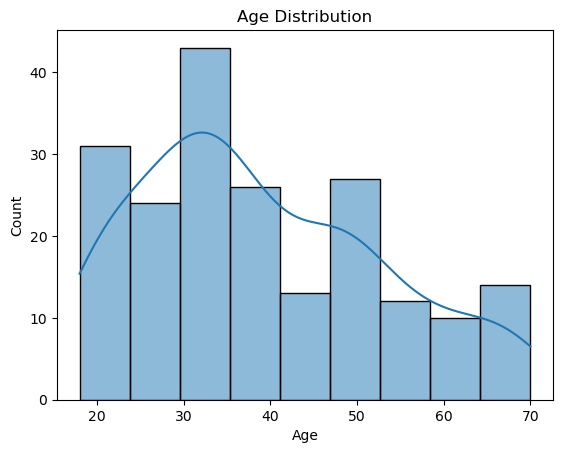

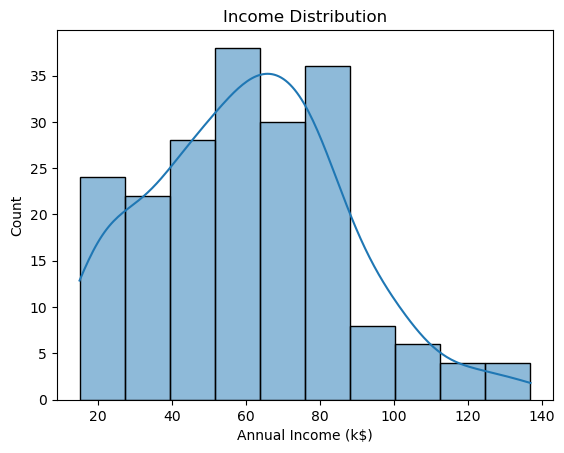

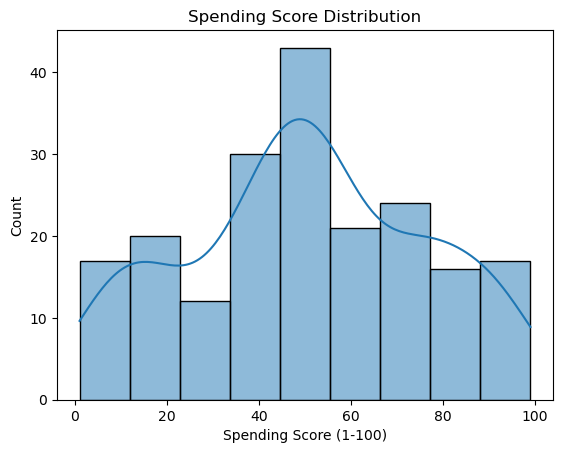

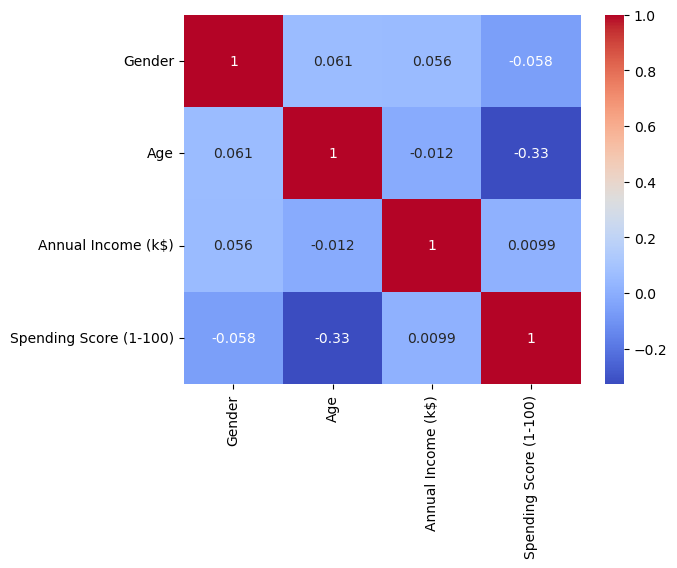

In [7]:

## 4. Exploratory Data Analysis (EDA)

# Distribution plots
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title("Income Distribution")
plt.show()

sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title("Spending Score Distribution")
plt.show()

# Correlation Heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [8]:

## 5. Feature Engineering

df['Income_per_Age'] = df['Annual Income (k$)'] / df['Age']
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_per_Age
0,1,19,15,39,0.789474
1,1,21,15,81,0.714286
2,0,20,16,6,0.800000
3,0,23,16,77,0.695652
4,0,31,17,40,0.548387


C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

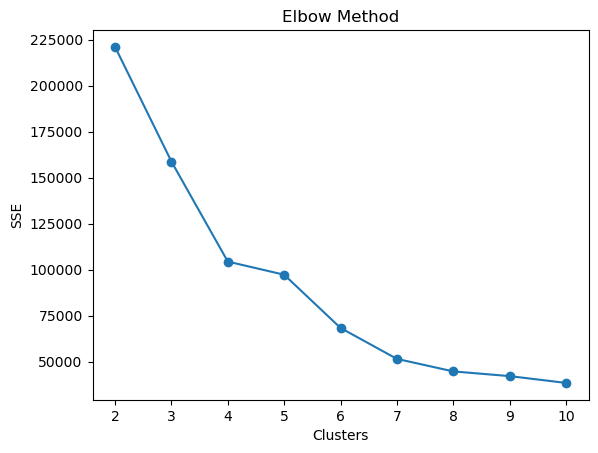

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Silhouette Score: 0.3575963460506624


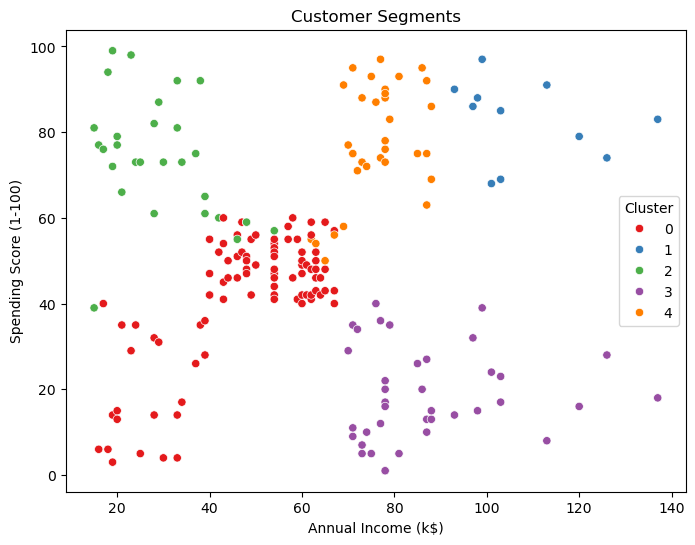

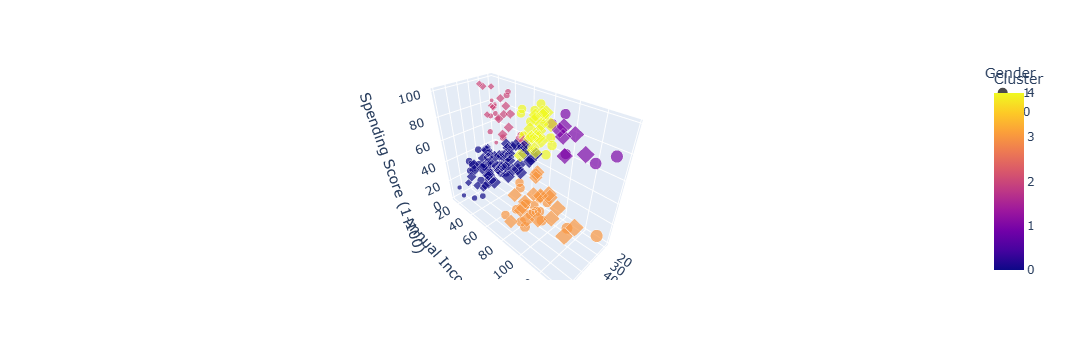

In [10]:

## 6. Clustering (KMeans)

X = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

# Elbow Method
sse = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(2,11), sse, marker='o')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Fit KMeans with optimal k=5 (commonly best here)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Silhouette Score
score = silhouette_score(X, df['Cluster'])
print("Silhouette Score:", score)

# Cluster Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title("Customer Segments")
plt.show()

# 3D Plot
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', 
                    color='Cluster', symbol='Gender', size='Annual Income (k$)', hover_data=['Age'])
fig.show()



## 7. Dashboard (Streamlit)
# Save this as app.py for interactive dashboard

'''
import streamlit as st
import plotly.express as px
import pandas as pd

# Load dataset
df = pd.read_csv("3579df99-42d4-4677-bef1-995999671550.csv")

st.title("Customer Segmentation Dashboard")

# Cluster Visualization
fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                 size='Age', color='Gender', hover_data=['Age'])
st.plotly_chart(fig)
'''



## 8. Conclusion

- Customers can be grouped into 5 segments based on Age, Income, and Spending Score.  
- Useful for marketing campaigns, targeted offers, and personalized services.  
